In [2]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

%metal_heading Welcome to Qiskit Metal!

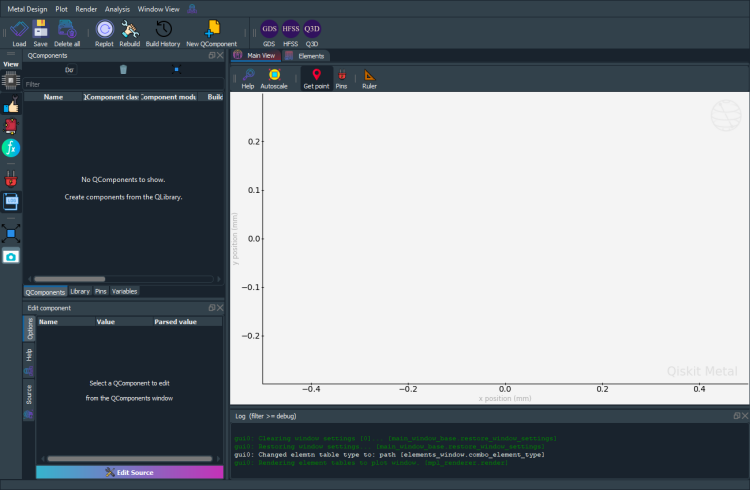

In [3]:
# First Metal Design
design = designs.DesignPlanar()

gui = MetalGUI(design)
gui.screenshot()

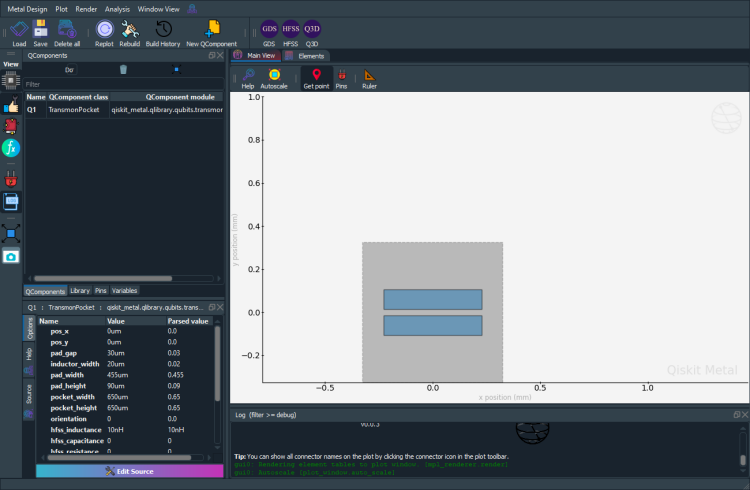

In [4]:
# Select a QComponent to create
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Create a new qcomponent object with the name 'Q1'
q1 = TransmonPocket(design, 'Q1')
gui.rebuild() # Rebuild the design and plot

# Save the screenshot
gui.edit_component('Q1')
gui.autoscale()
gui.screenshot()

In [5]:
# See what the quantum object looks like.
q1

name:    Q1
class:   TransmonPocket        
options: 
  'pos_x'             : '0um',                        
  'pos_y'             : '0um',                        
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '20um',                       
  'pad_width'         : '455um',                      
  'pad_height'        : '90um',                       
  'pocket_width'      : '650um',                      
  'pocket_height'     : '650um',                      
  'orientation'       : '0',                          
  'hfss_inductance'   : '10nH',                       
  'hfss_capacitance'  : 0,                            
  'hfss_resistance'   : 0,                            
  'hfss_mesh_kw_jj'   : 7e-06,                        
  'q3d_inductance'    : '10nH',                       
  'q3d_capacitance'   : 0,                            
  'q3d_resistance'    : 0,                            
  'q3d_mesh_k

In [6]:
%metal_print How do I edit options?  API or GUI

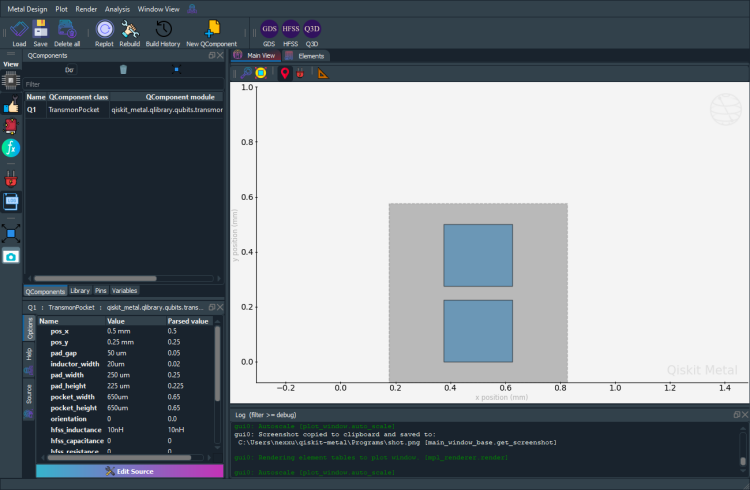

In [7]:
# Change Options
q1.options.pos_x = '0.5 mm'
q1.options.pos_y = '0.25 mm'
q1.options.pad_height = '225 um'
q1.options.pad_width = '250 um'
q1.options.pad_gap = '50 um'

# Update the Geometry, since we changed the options
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [8]:
q1 = design.components['Q1']

In [13]:
%metal_print Where are the default options

In [14]:
# Tells you how to get back to the original design from your custom one.
TransmonPocket.get_template_options(design)

{'pos_x': '0um',
 'pos_y': '0um',
 'connection_pads': {},
 '_default_connection_pads': {'pad_gap': '15um',
  'pad_width': '125um',
  'pad_height': '30um',
  'pad_cpw_shift': '5um',
  'pad_cpw_extent': '25um',
  'cpw_width': 'cpw_width',
  'cpw_gap': 'cpw_gap',
  'cpw_extend': '100um',
  'pocket_extent': '5um',
  'pocket_rise': '65um',
  'loc_W': '+1',
  'loc_H': '+1'},
 'pad_gap': '30um',
 'inductor_width': '20um',
 'pad_width': '455um',
 'pad_height': '90um',
 'pocket_width': '650um',
 'pocket_height': '650um',
 'orientation': '0',
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [16]:
%metal_print How do I override the default

In [17]:
design.overwrite_enabled = True

In [18]:
%metal_heading Quantum pins: QPins!

In [19]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

design.delete_all_components()

options = dict(
    pad_width = '424 um',
    pocket_height = '650 um',
    connection_pads = dict(
        # Pin Connectors
        a = dict(loc_W=+1, loc_H=+1),
        b = dict(loc_W=-1, loc_H=+1, pad_height = '30 um'),
        c = dict(loc_W=+1, loc_H=-1, pad_width = '200 um'),
        d = dict(loc_W=-1, loc_H=-1, pad_height = '50 um')
    )
)

q1 = TransmonPocket(design, 'Q1', options=dict(pos_x = '+0.5mm', pos_y = '+0.5mm', **options))

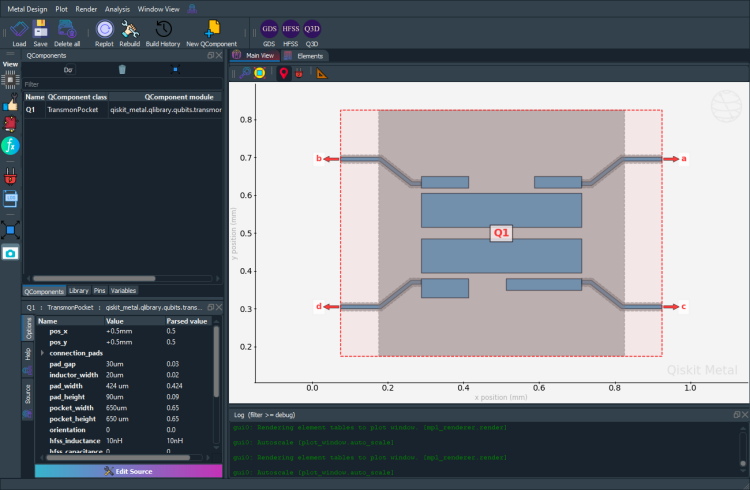

In [21]:
# Take a screenshot with the component highlighted and the pins showing
gui.rebuild()
gui.autoscale()
gui.edit_component('Q1')
gui.zoom_on_components(['Q1'])
gui.highlight_components(['Q1'])
gui.screenshot()

In [22]:
%metal_heading To Acces A Pin

In [23]:
q1.pins.a
q1.pins['a']

{'points': [array([0.925, 0.7  ]), array([0.925, 0.69 ])],
 'middle': array([0.925, 0.695]),
 'normal': array([1., 0.]),
 'tangent': array([0., 1.]),
 'width': 0.01,
 'gap': 0.006,
 'chip': 'main',
 'parent_name': 2,
 'net_id': 0,
 'length': 0}

In [24]:
gui.edit_component('Q1')
gui.edit_component_source('Q1')